In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

The idea of these small experiments was to see the benefits of using pre-trained embeddings in models that do slot-filling and intent recognition. Here, we show the results for the ATIS dataset. 

We considered two models:

- [A Novel Bi-directional Interrelated Model for Joint Intent Detection and Slot Filling](https://github.com/ZephyrChenzf/SF-ID-Network-For-NLU) (SF-ID)
- [Slot-Gated Modeling for Joint Slot Filling and Intent Prediction](https://github.com/MiuLab/SlotGated-SLU) (SlotGated)

We ran each model under the following conditions:

- **base**, the model with its default parameters.
- **glove**, using gloVe pre-trained embeddings.
- **bert-last**, using BERT to generate the embeddings. Here, we use the 2-last layer of BERT to get the embeddings.
- **bert-last-4**, using BERT to generate the embeddings. Here, we use the [sum of the last 4 layers of BERT](https://towardsdatascience.com/nlp-extract-contextualized-word-embeddings-from-bert-keras-tf-67ef29f60a7b) to get the embeddings.

In [2]:
def get_df_all(model):
    df_sfid_base = pd.read_csv(f"results/{model}.base.csv")
    df_sfid_base["cnd"] = "base"
    df_sfid_glove = pd.read_csv(f"results/{model}.glove.csv")
    df_sfid_glove["cnd"] = "glove"
    df_sfid_bert = pd.read_csv(f"results/{model}.bert-last.csv")
    df_sfid_bert["cnd"] = "bert-last"
    df_sfid_bert_4 = pd.read_csv(f"results/{model}.bert-last-4.csv")
    df_sfid_bert_4["cnd"] = "bert-last-4"
    df_all = pd.concat([df_sfid_base, df_sfid_glove, df_sfid_bert, df_sfid_bert_4])
    df_all["model"] = model
    return df_all

df_all_sfid = get_df_all("sfid")
df_all_slot = get_df_all("slot-gated")


df_all = pd.concat([df_all_sfid, df_all_slot])

# SF-ID model

### Metrics x Epochs chart

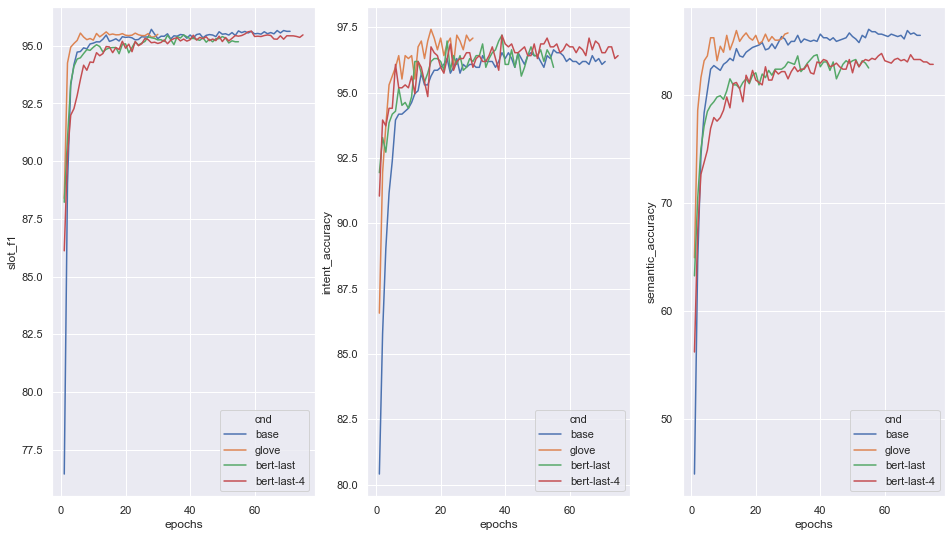

In [3]:
fig = plt.figure(figsize=(16,9))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

def plot_metric(df, model, metric, row, pos):
    ax = fig.add_subplot(row, 3, pos)
    return sns.lineplot(ax=ax, x="epochs", y=metric, 
                        data=df[(df.split == "test") & (df.model == model)], 
                        hue="cnd")


plot_metric(df_all, "sfid", "slot_f1", row=1, pos=1)
plot_metric(df_all, "sfid", "intent_accuracy", row=1, pos=2)
plot_metric(df_all, "sfid", "semantic_accuracy", row=1, pos=3)

In [10]:
def get_summary(model):
    conditions = ["base", "glove", "bert-last", "bert-last-4"]

    results = []

    for cnd in conditions:
        row = df_all[(df_all.cnd == cnd) & (df_all.split == "test") & (df_all.model == model)].tail(n=1)
        if not row.empty:
            results.append(row.values[0])

    results = pd.DataFrame(results, columns=df_all.columns)
    return results[["cnd", "epochs", "slot_f1", "intent_accuracy", "semantic_accuracy"]]


def get_summary_best(model):
    conditions = ["base", "glove", "bert-last", "bert-last-4"]

    results = []

    for cnd in conditions:
        rows = df_all[(df_all.cnd == cnd) & (df_all.split == "test") & (df_all.model == model)]
        slot_f1 = rows.slot_f1.max()
        intent_accuracy = rows.intent_accuracy.max()
        semantic_accuracy = rows.semantic_accuracy.max()
        results.append([cnd, slot_f1, intent_accuracy, semantic_accuracy])


    results = pd.DataFrame(results, columns=["cnd", "slot_f1", "intent_accuracy", "semantic_accuracy"])
    return results 

### Summary of the results

Here we show the values of the last epoch in each of the conditions.

In [11]:
get_summary("sfid")

,cnd,epochs,slot_f1,intent_accuracy,semantic_accuracy
0,base,71,95.627645,96.192609,85.554311
1,glove,30,95.497086,97.088466,85.778275
2,bert-last,55,95.175618,95.968645,82.530795
3,bert-last-4,75,95.472576,96.416573,82.866741


### Summary of the results (best epochs)

Here we show the values of the best epoch in each of the conditions.

In [12]:
get_summary_best("sfid")

,cnd,slot_f1,intent_accuracy,semantic_accuracy
0,base,95.715041,96.640538,86.114222
1,glove,95.603037,97.424412,86.002240
2,bert-last,95.470097,97.200448,83.762598
3,bert-last-4,95.634323,97.200448,83.874580


# SlotGated model

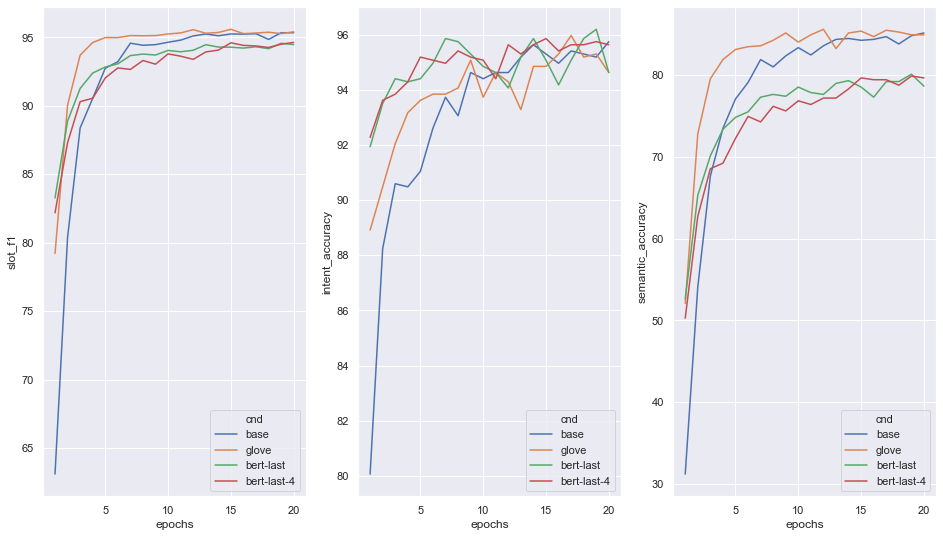

In [6]:
fig = plt.figure(figsize=(16,9))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plot_metric(df_all, "slot-gated", "slot_f1", row=1, pos=1)
plot_metric(df_all, "slot-gated", "intent_accuracy", row=1, pos=2)
plot_metric(df_all, "slot-gated", "semantic_accuracy", row=1, pos=3)

### Summary of the results

Here we show the values of the last epoch in each of the conditions.

In [13]:
get_summary("slot-gated")

,cnd,epochs,slot_f1,intent_accuracy,semantic_accuracy
0,base,20,95.340628,95.744681,85.106383
1,glove,20,95.408971,94.624860,84.882419
2,bert-last,20,94.476347,94.624860,78.611422
3,bert-last-4,20,94.634547,95.632699,79.619261


### Summary of the results (best epochs)

Here we show the values of the best epoch in each of the conditions.

In [14]:
get_summary_best("slot-gated")

,cnd,slot_f1,intent_accuracy,semantic_accuracy
0,base,95.343915,95.744681,85.106383
1,glove,95.592625,95.968645,85.554311
2,bert-last,94.569826,96.192609,80.067189
3,bert-last-4,94.634547,95.856663,79.843225
